











8.999999999999979


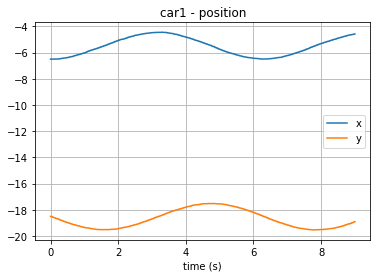

In [3]:
#!/usr/bin/env python
# coding: utf-8
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import numpy as np
from IPython.display import HTML, display
from flightgoggles.env import *

if __name__ == "__main__":
    env = flightgoggles_env(
        cfg_dir="../config",
        cfg_fgclient="FlightGogglesClient_demo_car.yaml",
        cfg_car="carDynamicsSim.yaml")

    for j in range(900):
        env.proceed(
            vehicle_id="car1", 
            speed_command=1.0, 
            steering_angle_command=1.0, 
            duration=0.01)
    env.plot_state(vehicle_id="car1", attribute="position")
    env.save_logs(vehicle_id="car1", save_dir="data/")

    img = env.get_camera_image(camera_id="cam1")
    print(img[-1]["timestamp"])
    
    ani_set = env.plot_state_video(flag_save=False, filename="car", dpi=400)
    if "cam1" in ani_set.keys():
        display(HTML(ani_set["cam1"].to_html5_video()))
    env.close()